In [1]:
!pip install librosa

  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201375 sha256=3b80f0165b18a3e14627de522da0bdc83464e6c03c148f05d5279b88b7f831a0
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\aa\5a\92\d52f6f8560ff05a2525e6030a1903412df876714241fb76802
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=cd35e47c2fab6549144e7fdbe6fbd982d03e6f622697243fe4bb2538701cf08d
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=bcb61ac4700b0e21ed79d97034cb5056062b0f8ce543df175d7ceb624e4d295d
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built librosa audioread resampy


# EDA

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

In [4]:
filename='Desktop/UrbanSound8K/audio/fold1/17592-5-1-1.wav'

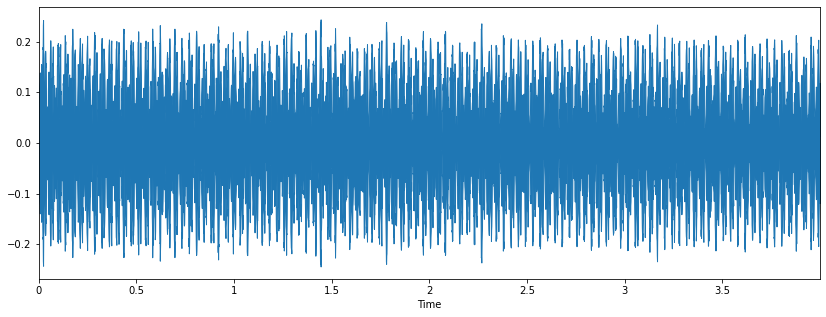

In [5]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

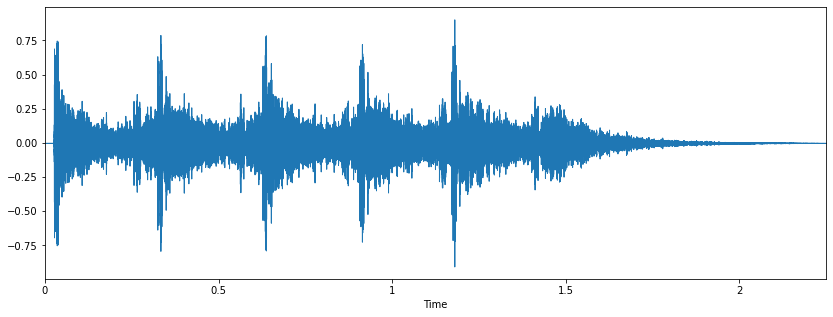

In [6]:
filename='Desktop/UrbanSound8K/audio/fold1/7061-6-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [7]:
sample_rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [9]:
wave_sample_rate

44100

In [10]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

In [11]:
data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0231203e-05,
       2.3116412e-05, 0.0000000e+00], dtype=float32)

In [12]:
import pandas as pd
metadata=pd.read_csv('Desktop/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
metadata.shape

(8732, 8)

In [14]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

jackhammer          1000
engine_idling       1000
air_conditioner     1000
dog_bark            1000
street_music        1000
drilling            1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Preprocessing

In [15]:
audio_file_path='Desktop/UrbanSound8K/audio/fold8/7390-9-0-9.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [16]:
print(librosa_audio_data)

[0.0151851  0.03118107 0.0412848  ... 0.03054644 0.02837966 0.032519  ]


In [17]:
librosa_sample_rate

22050

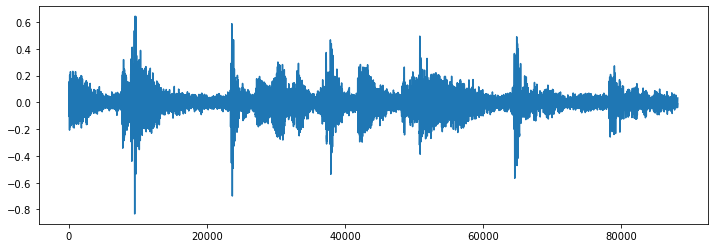

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [19]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(audio_file_path)

In [20]:
wave_audio #two channels

array([[ 699,  677],
       [ 751,  730],
       [ 979,  952],
       ...,
       [ 969,  988],
       [ 998, 1005],
       [1030, 1034]], dtype=int16)

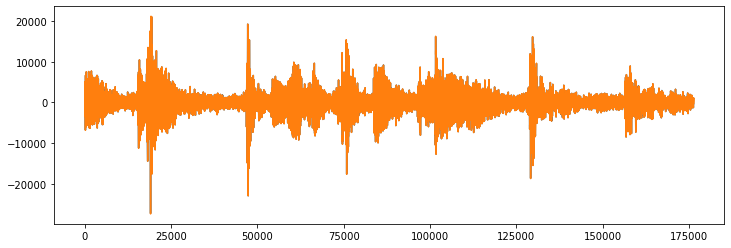

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification. 
For more about MFCC https://www.youtube.com/watch?v=4_SH2nfbQZ8&t=0s

In [22]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [23]:
mfccs

array([[-1.6177774e+02, -1.6435562e+02, -1.6032550e+02, ...,
        -2.6134903e+02, -2.7040903e+02, -2.7774481e+02],
       [ 1.3363406e+02,  1.3197044e+02,  1.3274139e+02, ...,
         1.4547200e+02,  1.5052621e+02,  1.4113068e+02],
       [-5.6479958e+01, -6.1028034e+01, -6.5254440e+01, ...,
        -2.2697479e+01, -9.4022894e+00, -3.4897254e+00],
       ...,
       [ 1.9332043e+01,  1.9136795e+01,  1.8509428e+01, ...,
         4.4952626e+00,  4.7824440e+00,  1.1431167e+01],
       [-1.0388115e+01, -1.2775034e+01, -7.8180313e+00, ...,
         3.0846357e-01,  1.2921810e-01,  4.4284272e+00],
       [-1.8609451e+01, -2.1716789e+01, -1.9923515e+01, ...,
         3.1254063e+00, -1.4173818e+00, -4.7018652e+00]], dtype=float32)

In [24]:
import os

audio_dataset_path='Desktop/UrbanSound8K/audio/'
metadata=pd.read_csv('Desktop/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [25]:
def features_extractor(file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast') 
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [26]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [08:06,  6.36it/s]C:\Users\ASUS\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [17:31, 10.36it/s]C:\Users\ASUS\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8327it [17:31, 12.54it/s]C:\Users\ASUS\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [18:17,  7.96it/s]


In [27]:
extracted_features

[[array([-2.1579301e+02,  7.1666122e+01, -1.3181377e+02, -5.2091328e+01,
         -2.2115967e+01, -2.1764179e+01, -1.1183746e+01,  1.8912683e+01,
          6.7266383e+00,  1.4556894e+01, -1.1782045e+01,  2.3010368e+00,
         -1.7251303e+01,  1.0052423e+01, -6.0094995e+00, -1.3153188e+00,
         -1.7693510e+01,  1.1171225e+00, -4.3699460e+00,  7.2629538e+00,
         -1.1815969e+01, -7.4952617e+00,  5.4577127e+00, -2.9442446e+00,
         -5.8693881e+00, -9.8653689e-02, -3.2121704e+00,  4.6092515e+00,
         -5.8293266e+00, -5.3475080e+00,  1.3341198e+00,  7.1307821e+00,
         -7.9449996e-02,  1.7109245e+00, -5.6941996e+00, -2.9041710e+00,
          3.0366950e+00, -1.6827590e+00, -8.8585860e-01,  3.5438877e-01],
        dtype=float32),
  'dog_bark'],
 [array([-4.2468677e+02,  1.1056227e+02, -5.4148235e+01,  6.2010738e+01,
         -7.0951545e-01,  1.8157396e+01,  1.4451566e+00,  1.1161131e+01,
         -1.7058896e+00,  1.2360451e+01, -1.1055476e+01,  2.0736568e+01,
         -8

In [28]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.180405,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [30]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [31]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [32]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786110e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936135e+00],
       [-4.9532028e+01,  1.5521893e-01, -2.0369110e+01, ...,
         2.0491769e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766800e-01,  7.8490514e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820302e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321609e+00]], dtype=float32)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6985, 40), (1747, 40), (6985, 10), (1747, 10))

# Model

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

In [37]:
y.shape[1] #no.of classes

10

In [38]:
#ANN Model

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 


checkpointer=ModelCheckpoint(filepath='Desktop/UrbanSound8K/saved_models/audio_classification.hdf5', 
                               verbose=1,save_best_only=True)
start=datetime.now()

model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test, y_test),callbacks=[checkpointer],verbose=1)


duration=datetime.now()-start
print("Training completed in time: ",duration)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9473 - accuracy: 0.6862 - val_loss: 0.7604 - val_accuracy: 0.7728

Epoch 00001: val_loss improved from inf to 0.76037, saving model to Desktop/UrbanSound8K/saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9561 - accuracy: 0.6820 - val_loss: 0.7755 - val_accuracy: 0.7607

Epoch 00002: val_loss did not improve from 0.76037
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9439 - accuracy: 0.6830 - val_loss: 0.7525 - val_accuracy: 0.7710

Epoch 00003: val_loss improved from 0.76037 to 0.75250, saving model to Desktop/UrbanSound8K/saved_models\audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.9419 - accuracy: 0.6816 - val_loss: 0.7657 - val_accuracy: 0.7682

Epoch 00004: val_loss did not improve from 0.75250
Epoch 5/100
219/219 [==============================] - 1s 3ms/

219/219 [==============================] - 1s 3ms/step - loss: 0.9081 - accuracy: 0.6984 - val_loss: 0.7139 - val_accuracy: 0.7836

Epoch 00040: val_loss did not improve from 0.70649
Epoch 41/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9162 - accuracy: 0.6942 - val_loss: 0.7067 - val_accuracy: 0.7865

Epoch 00041: val_loss did not improve from 0.70649
Epoch 42/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9095 - accuracy: 0.7022 - val_loss: 0.7269 - val_accuracy: 0.7853

Epoch 00042: val_loss did not improve from 0.70649
Epoch 43/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8991 - accuracy: 0.6963 - val_loss: 0.7301 - val_accuracy: 0.7768

Epoch 00043: val_loss did not improve from 0.70649
Epoch 44/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8913 - accuracy: 0.7006 - val_loss: 0.7201 - val_accuracy: 0.7911

Epoch 00044: val_loss did not improve from 0.70649
Epoch 45/100
219/219 [===========

219/219 [==============================] - 1s 3ms/step - loss: 0.8790 - accuracy: 0.7152 - val_loss: 0.7054 - val_accuracy: 0.7831

Epoch 00079: val_loss did not improve from 0.69068
Epoch 80/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8725 - accuracy: 0.7054 - val_loss: 0.6787 - val_accuracy: 0.7905

Epoch 00080: val_loss improved from 0.69068 to 0.67869, saving model to Desktop/UrbanSound8K/saved_models\audio_classification.hdf5
Epoch 81/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8904 - accuracy: 0.7112 - val_loss: 0.7016 - val_accuracy: 0.7928

Epoch 00081: val_loss did not improve from 0.67869
Epoch 82/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8817 - accuracy: 0.7062 - val_loss: 0.6937 - val_accuracy: 0.7894

Epoch 00082: val_loss did not improve from 0.67869
Epoch 83/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8646 - accuracy: 0.7102 - val_loss: 0.6679 - val_accuracy: 0.8048

Epo

In [44]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7927876114845276


In [46]:
model.predict_classes(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 3, 4, ..., 1, 2, 5], dtype=int64)

In [47]:
filename='Desktop/UrbanSound8K/audio/fold1/7061-6-0-0.wav'
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

array([9], dtype=int64)

In [48]:
prediction_feature.shape

(1, 40)

# Test

In [51]:
filename="Desktop/UrbanSound8K/audio/fold1/17592-5-1-1.wav"
audio,sample_rate=librosa.load(filename,res_type='kaiser_fast') 
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.48043213e+02  1.43610550e+02 -1.59312000e+01  4.20263786e+01
  7.61557293e+00  1.79111385e+01 -6.95917559e+00  8.83919334e+00
 -3.67768574e+00  2.09650021e+01 -1.57015836e+00  1.93057766e+01
  1.00319510e+01  1.12399378e+01  5.78167737e-01  1.29954844e+01
  7.87398100e+00  1.37050104e+01  6.34247303e+00  7.69898939e+00
  1.19660616e+01  7.93705702e+00  6.35395384e+00  1.15480995e+01
  9.80715275e+00  1.04304738e-01 -5.57633877e-01  3.98423696e+00
  3.70262885e+00 -1.98623776e+00 -4.31767315e-01 -7.88323402e-01
  2.88908172e+00 -9.95569050e-01 -1.97728682e+00  1.13806772e+00
  2.20542812e+00 -1.85442019e+00  3.06381655e+00  4.64248276e+00]
[[-2.48043213e+02  1.43610550e+02 -1.59312000e+01  4.20263786e+01
   7.61557293e+00  1.79111385e+01 -6.95917559e+00  8.83919334e+00
  -3.67768574e+00  2.09650021e+01 -1.57015836e+00  1.93057766e+01
   1.00319510e+01  1.12399378e+01  5.78167737e-01  1.29954844e+01
   7.87398100e+00  1.37050104e+01  6.34247303e+00  7.69898939e+00
   1.19660616e+01  

array(['engine_idling'], dtype='<U16')